In [1]:
import csv
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('data/training_set_VU_DM.csv')

In [3]:
# df['year'] = df['date_time'].astype(str).str[0:4].astype(int)
# df['month'] = df['date_time'].astype(str).str[5:7].str.lstrip('0').astype(int)
# df['day'] = df['date_time'].astype(str).str[8:10].str.lstrip('0').astype(int)
# df['time'] = df['date_time'].astype(str).str[10:19].str.lstrip('0')
# df['date_time'] = pd.to_datetime(df['date_time'])
# df['day_of_week'] = df['date_time'].dt.dayofweek

In [4]:
print('variables', df.columns)
print('shape of dataframe', df.shape)
print('# of logs',len(df))
print('# of not clicked', len(df.loc[(df['click_bool']==0)]))
print('# of clicked', len(df.loc[(df['click_bool']==1)]))
print('# of clicked and not booked', len(df.loc[(df['click_bool']==1) & (df['booking_bool']==0)]))
print('# of clicked and booked', len(df.loc[(df['click_bool']==1) & (df['booking_bool']==1)]))

variables Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'c

In [5]:
train=df.dropna(axis=1,how="any")

In [6]:
train.loc[train['srch_id']==56]

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
658,56,2013-04-02 12:23:19,5,219,158,7730,5,0,2.08,5.97,...,21401,5,96,1,0,1,0,1,0,0
659,56,2013-04-02 12:23:19,5,219,158,68902,5,1,2.40,5.12,...,21401,5,96,1,0,1,0,1,0,0
660,56,2013-04-02 12:23:19,5,219,158,71109,5,1,0.00,6.12,...,21401,5,96,1,0,1,0,1,0,0
661,56,2013-04-02 12:23:19,5,219,158,81162,5,1,4.19,5.19,...,21401,5,96,1,0,1,0,1,1,0
662,56,2013-04-02 12:23:19,5,219,158,106889,5,1,0.00,6.12,...,21401,5,96,1,0,1,0,1,0,0
663,56,2013-04-02 12:23:19,5,219,158,121297,5,1,2.08,5.20,...,21401,5,96,1,0,1,0,1,0,0


In [7]:
# train.corr()

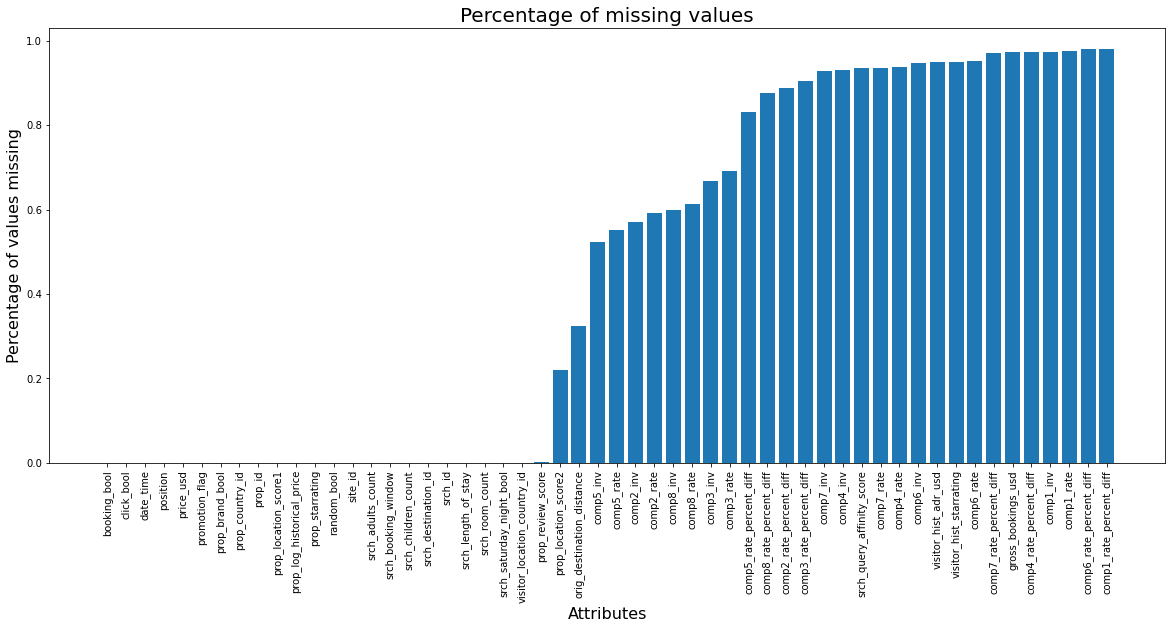

In [8]:
perc_missing = []
for var in df.columns:
    perc_missing.append(df[var].isna().sum() / len(df[var]))
    
labels = list(df.columns)
labels = [label for _, label in sorted(zip(perc_missing, labels))]
perc_missing.sort()
values = perc_missing
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x, values)
ax.set_title('Percentage of missing values', fontsize=20)
ax.set_ylabel('Percentage of values missing', fontsize=16)
ax.set_xlabel('Attributes', fontsize=16)
plt.xticks(rotation=90)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

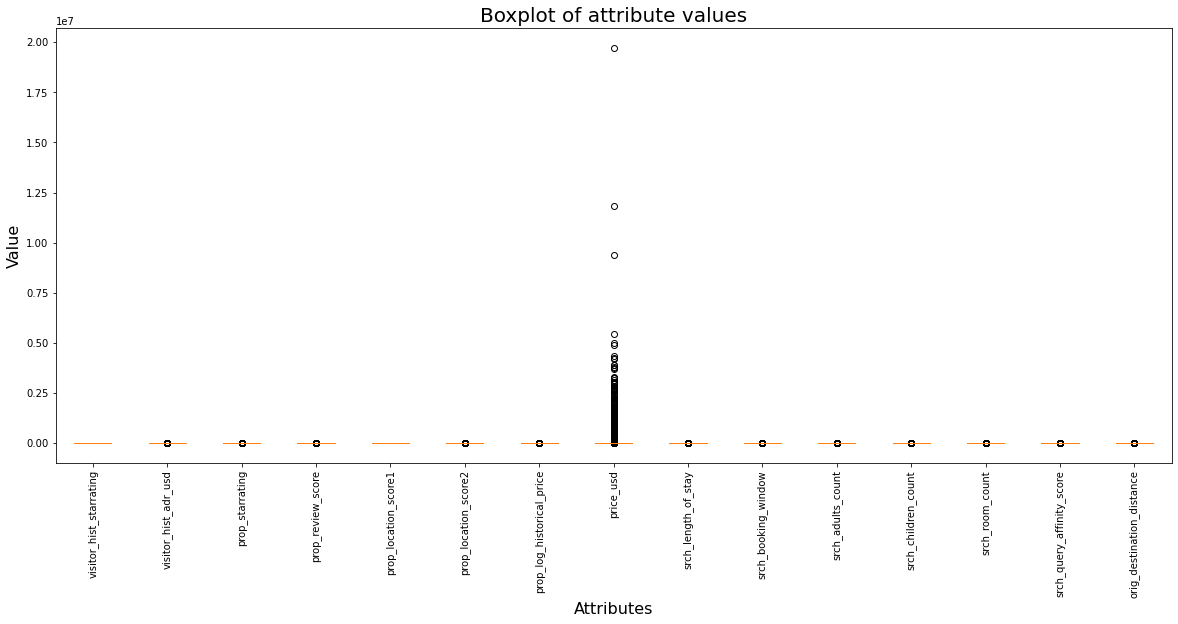

In [9]:
def create_boxplot(boxplot_cols):
    if 'date_time' in boxplot_cols:
        boxplot_cols.remove('date_time')
    values_dict = {}
    for col in boxplot_cols:
        val_col = df[col].dropna(axis=0)
        values_dict[col] = val_col

    fig, ax = plt.subplots(figsize=(20,8))
    ax.boxplot(values_dict.values())
    ax.set_xticklabels(values_dict.keys())
    ax.set_title('Boxplot of attribute values', fontsize=20)
    ax.set_ylabel('Value', fontsize=16)
    ax.set_xlabel('Attributes', fontsize=16)
    plt.xticks(rotation=90)
    plt.show()

# boxplot_cols = ['prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
#                 'prop_location_score2', 'prop_log_historical_price', 
#                 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 
#                 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff',
#                 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff',
#                 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff',
#                 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff',
#                 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff',
#                 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff',
#                 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff',]

# boxplot_cols = [ 
#                 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 
#                 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff',
#                 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff',
#                 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff',
#                 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff',
#                 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff',
#                 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff',
#                 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff',]

boxplot_cols = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_starrating', 'prop_review_score',
               'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price',
               'price_usd', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 
               'srch_children_count', 'srch_room_count', 'srch_query_affinity_score', 'orig_destination_distance']

create_boxplot(boxplot_cols)

# create_boxplot(['price_usd'])

In [1]:
import numpy as np
from LambdaRankNN import LambdaRankNN

# generate query data
X = np.array([[0.2, 0.3, 0.4],
              [0.1, 0.7, 0.4],
              [0.3, 0.4, 0.1],
              [0.8, 0.4, 0.3],
              [0.9, 0.35, 0.25]])
y = np.array([0, 1, 0, 0, 2])
qid = np.array([1, 1, 1, 2, 2])

# train model
ranker = LambdaRankNN(input_size=X.shape[1], hidden_layer_sizes=(16,8,), activation=('relu', 'relu',), solver='adam')
ranker.fit(X, y, qid, epochs=5)
y_pred = ranker.predict(X)
ranker.evaluate(X, y, qid, eval_at=5)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.2026
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 0.2023
Epoch 3/5
1/1 [==============================] - 0s 26ms/step - loss: 0.2019
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 0.2016
Epoch 5/5
1/1 [==============================] - 0s 27ms/step - loss: 0.2013
ndcg: 0.6309297535714575
ndcg@5: 0.6309297535714575
